/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.

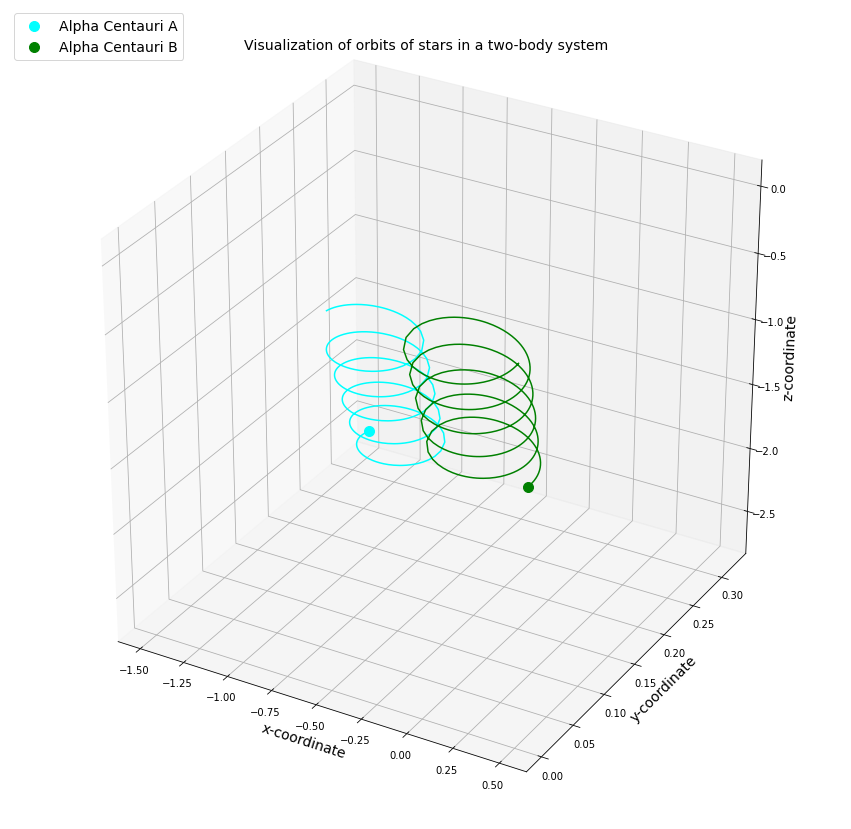

In [ ]:
#A PROGRAM FOR SIMULATING ORBITS OF TWO BODIES FROM ARBITRARY POINT IN SPACE
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11                                          #N-m2/kg2

#Reference quantities for normalization
m_nd=1.989e+30                                         #mass of the sun in kg
r_nd=5.326e+12                                         #distance between stars in Alpha Centauri in m
v_nd=30000                                             #relative velocity of earth around the sun in m/s
t_nd=79.91*365*24*3600*0.51                            #orbital period of Alpha Centauri in s

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses (non-dimensionalized)
m1=1.1                                                  #Alpha Centauri A in solar masses
m2=0.907                                                #Alpha Centauri B in solar masses

#Define initial position vectors (non-dimensionalized)
r1=[-0.5,0,0]                                           #in m
r2=[0.5,0,0]                                            #in m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

#Define initial velocities (non-dimensionalized)
v1=[0.01,0.01,0]                                        #m/s
v2=[-0.05,0,-0.1]                                       #m/s

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

def TwoBodyEquations(w,t,G,m1,m2):                     #A function defining the equations of motion
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1)                           #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs
    #Package initial parameters
init_params=sci.array([r1,r2,v1,v2])                    #create array of initial params
init_params=init_params.flatten()                       #flatten array to make it 1D
time_span=sci.linspace(0,8,500)                         #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]
v1_sol=two_body_sol[:,6:9]
v2_sol=two_body_sol[:,9:12]
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="cyan")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="green")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="cyan",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

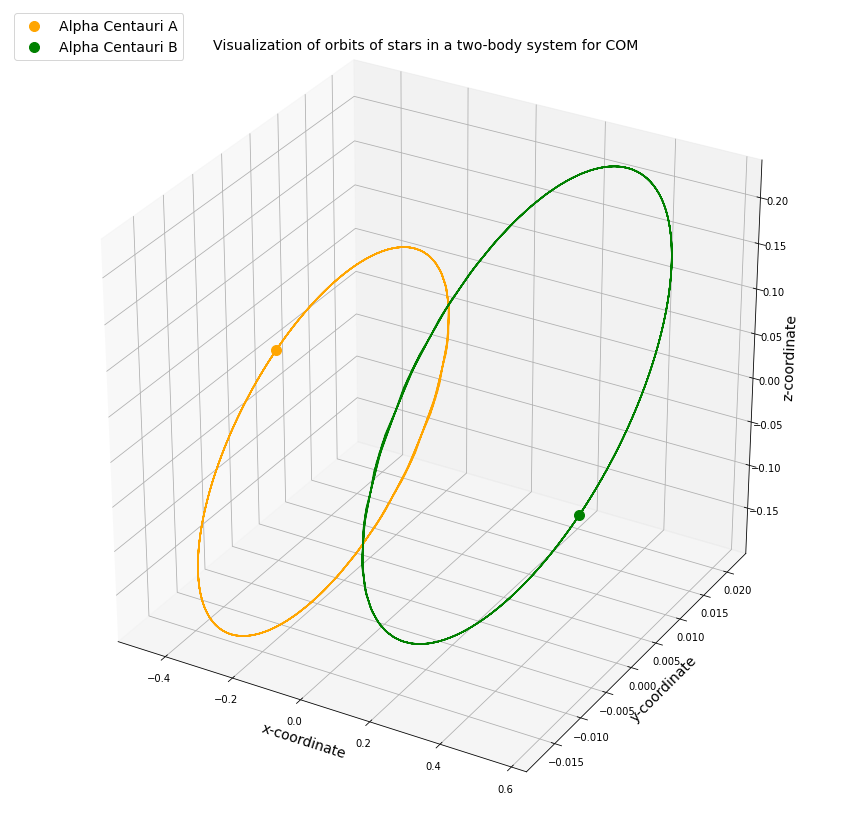

In [ ]:
#Orbit with respect to COM

#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="orange")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="green")
#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="orange",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system for COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0

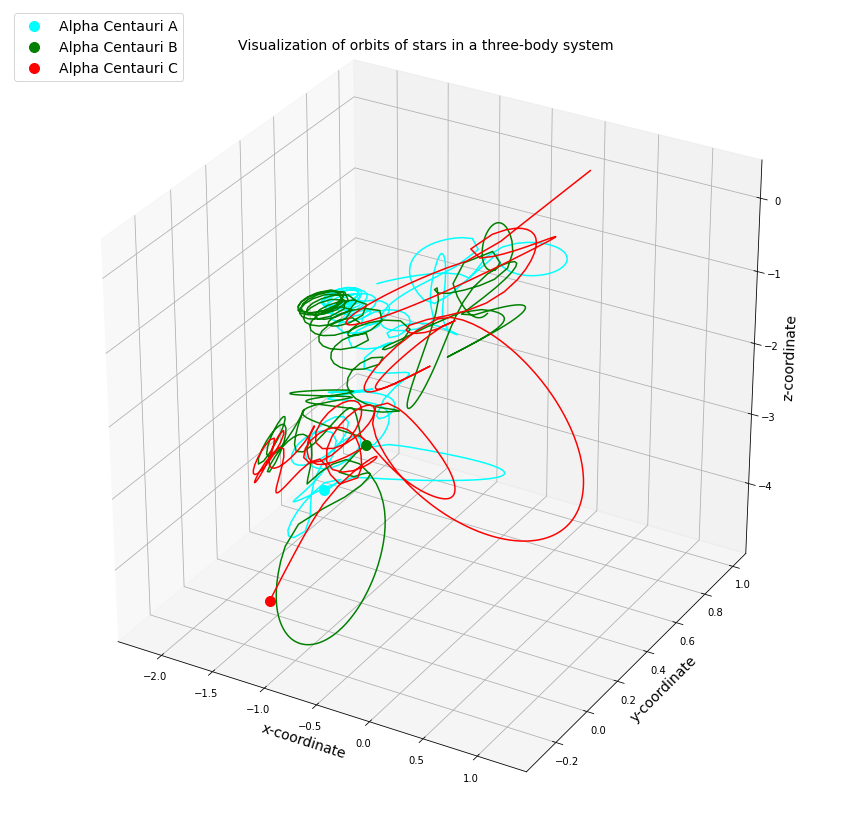

In [ ]:
#A PROGRAM FOR SIMULATING ORBITS OF THREE BODIES FROM ARBITRARY POINT IN SPACE
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define universal gravitation constant
G=6.67408e-11                                                #N-m2/kg2

#Reference quantities for normalization
m_nd=1.989e+30                                               #mass of the sun in kg
r_nd=5.326e+12                                               #distance between stars in Alpha Centauri in m (you can take any other binary system)
v_nd=30000                                                   #relative velocity of earth around the sun in m/s
t_nd=79.91*365*24*3600*0.51                                  #orbital period of Alpha Centauri in s

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1                                                        #Alpha Centauri A
m2=0.907                                                      #Alpha Centauri B
m3=1.0                                                        #Alpha Centauri C (taken arbitrarily equal to solar mass)

#Define initial position vectors
r1=[-0.5,0,0]                                                 #Position of Alpha Centauri A in m
r2=[0.5,0,0]                                                  #Position of Alpha Centauri B in m
r3=[0,1,0]                                                    #Position of Alpha Centauri C in m

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Define initial velocities
v1=[0.01,0.01,0]                                               #m/s
v2=[-0.05,0,-0.1]                                              #m/s
v3=[0,-0.01,0]                                                 #m/s


#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")

#Find velocity of COM                                           #A function defining the equations of motion
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)                                   #Calculate magnitude or norm of vector
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)

    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v12_derivs,dv3bydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs
  #Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,500) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="cyan")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="green")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="red")

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="cyan",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="red",marker="o",s=100,label="Alpha Centauri C")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

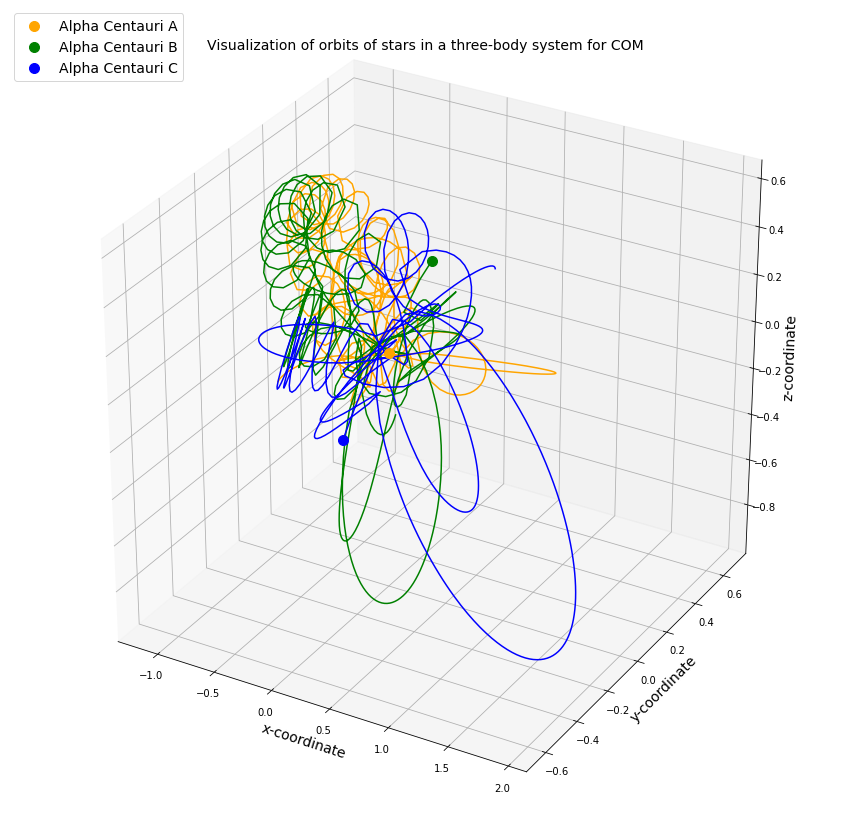

In [ ]:
#Orbit with respect to COM

#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol-rcom_sol
#Find location of Alpha Centauri C w.r.t COM
r3com_sol=r3_sol-rcom_sol

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="orange")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="green")
ax.plot(r3com_sol[:,0],r3com_sol[:,1],r3com_sol[:,2],color="blue")

#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="orange",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3com_sol[-1,0],r3com_sol[-1,1],r3com_sol[-1,2],color="blue",marker="o",s=100,label="Alpha Centauri C")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system for COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)


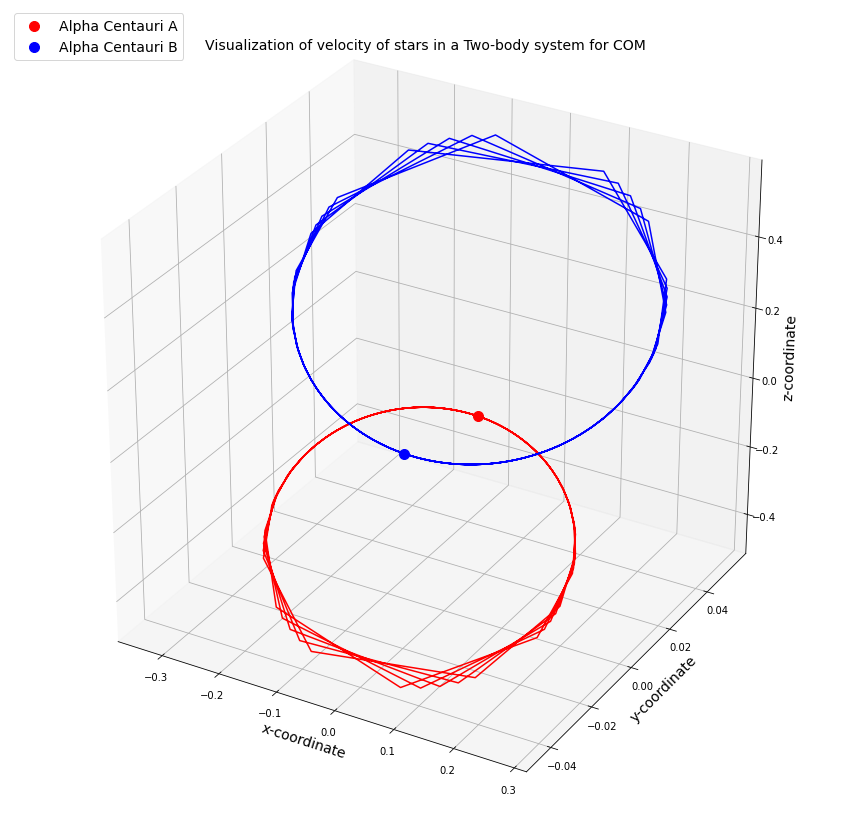

In [ ]:
v1_sol=two_body_sol[:,6:9]
v2_sol=two_body_sol[:,9:12]

vcom_sol=(m1*v1_sol+m2*v2_sol)/(m1+m2)

v1com_sol=v1_sol-vcom_sol

v2com_sol=v2_sol-vcom_sol


#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

ax.plot(v1com_sol[:,0],v1com_sol[:,1],v1com_sol[:,2],color="red")
ax.plot(v2com_sol[:,0],v2com_sol[:,1],v2com_sol[:,2],color="blue")

ax.scatter(v1com_sol[-1,0],v1com_sol[-1,1],v1com_sol[-1,2],color="red",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(v2com_sol[-1,0],v2com_sol[-1,1],v2com_sol[-1,2],color="blue",marker="o",s=100,label="Alpha Centauri B")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of velocity of stars in a Two-body system for COM\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)